  
# Trabajo Práctico 2

## Simulación de Eventos Discretos

#### Departamento de Computación - Facultad de Ciencias Exactas y Naturales - Universidad de Buenos Aires

25 de Octubre de 2021

**Grupo 04:** Confalonieri, Gisela - Lucero, Emiliano
    

----

# Modelo conceptual

En el presente trabajo modelaremos una simplificación del funcionamiento de la toma de radiografías.

Una radiografía es una técnica diagnóstica radiológica, en la que la imagen se obtiene al exponer al receptor de imagen radiográfica a una fuente de radiación de alta energía, comúnmente rayos X o radiación gamma procedente de isótopos radiactivos. Al interponer un objeto entre la fuente de radiación y el receptor, las partes más densas aparecen con diferentes tonos dentro de una escala de grises [1]. 

Los rayos X y los rayos gamma comprenden la porción de las altas energías y cortas longitudes de onda del espectro electromagnético. Los rayos gamma y los rayos X de igual longitud de onda tienen idénticas propiedades. Características de la radiación ionizante se basan en las siguientes características de los rayos X y de los rayos gamma:

* Tienen una longitud de onda inversamente proporcional a su energía
* No tienen carga eléctrica ni tienen masa.
* En el espacio, ambos **viajan en línea recta a la velocidad de la luz.**
* **Pueden penetrar la materia; la profundidad de la penetración depende de la longitud de onda de la radiación y de la naturaleza del material que es penetrado.**
* **Son absorbidos por la materia; el porcentaje de absorción es función de la densidad y el espesor del material y de la longitud de onda de la radiación.**
* Son dispersados por la materia; la cantidad de dispersión es función de la densidad de la materia y de la longitud de onda de la radiación.
* Pueden ionizar la materia.
* Pueden exponer un film/detector por ionización.
* Pueden producir fluorescencia en ciertos materiales.
* No pueden detectarse por medio de los sentidos humanos.
[1]


<!---Los rayos X, como los rayos de la luz visible, divergen desde su fuente de emisión y cubren mayores áreas en la medida que aumenta la distancia desde la fuente. NO VAMOS A CONSIDERAR ESTO EN PRINCIPIO--->


En la medida que los fotones de alta energía pasan a través de un material, su energía decrece. Esto se conoce como **atenuación**. La teoría de atenuación dice que fotones de mayores energías viajan a través de los tejidos más fácilmente que los fotones de bajas energías (esto se relaciona mucho con el efecto fotoeléctrico)[2]. <!---La probabilidad de absorción fotoeléctrica es aproximadamente proporcional a $$(Z/E)^3$$, donde Z es el número atómico del átomo de tejido y E es la energía del fotón. A medida que E es más grande, la probabilidad de interacción cae rápidamente .--->

<!--- lo que finalmente es la "placa de radiografía" es la marca de los rayos que han logrado atravesar las partes más blandas y llegar al chasis con la placa (por eso los huesos salen blancos y los pulmones, que tienen aire, negros). 

Además, los rayos se atenúan con la distancia, por lo que cambia la cantidad de radiación necesaria según la distancia del cañón al objetivo, y la calidad de imagen que se desea obtener.--->

Entonces, en este trabajo nos interesa modelar una vista "transversal" de este proceso: simulando el disparo de fotones desde ciertos puntos en un extremo de un plano y con cierta energía inicial, su avance en el espacio en línea recta, la atenuación de su energía en la medida que recorre el aire y/o se encuentra con materiales que puedan absorber parte de la energía, y la energía con la que llegan los fotones al extremo receptor del plano, representando la imagen radiológica resultante.

Por simplicidad, no consideraremos en nuestro primer modelo los aspectos de dispersión de radiación ni divergencia desde la fuente de emisión (es decir, que los rayos cubren mayores áreas en la medida que aumenta la distancia desde la fuente). Por lo tanto, nuestro modelo sólo considerará rayos que se disparan en línea recta desde la fuente emisora hacia el extremo receptor.

![](./imgs/idea_radiografia.png)

## Estructura del modelo


* La dinámica de los fotones se modela en una grilla de celdas, comenzando en el extremo izquierdo y trasladándose hasta el extremo derecho en ángulo recto. Cada celda representa la carga energética de un haz de múltiples fotones que se comportan de manera idéntica.
* El extremo izquierdo de la grilla representa la fuente de radiación. Al comenzar la simulación, se establecen las cargas iniciales de los fotones en la primer celda de cada fila (no hay puertos de entrada).
* El extremo derecho de la grilla representa el receptor. Al llegar un haz de fotones a la última celda de cada fila, se emite un *output* correspondiente a la carga de los fotones en ese momento.
* Otra grilla modela los obstáculos con los que se encuentran los fotones en su camino. En este caso, cada celda contiene el coeficiente de atenuación dependiendo del material del objeto y la densidad del mismo.
* Mediante las reglas, se define el movimiento de los fotones en el tiempo y el cálculo de atenuación de cargas dependiendo del material que atraviesen los fotones.
* Asumimos que no hay rebotes de fotones.
* Interpretamos cada celda de ambas grillas como 1cm³ de espacio. Es decir, una grilla tendrá en sus celdas la representación de la energía de los fotones en ese cm³, y la otra grilla tendrá en sus celdas la representación del coeficiente de atenuación de un material en ese cm³.

Las siguientes imágenes representan lo descrito arriba. El tamaño de las grillas en las imágenes es a modo orientativo, ya que trabajaremos con casos de diferentes tamaños.

*Grilla de celdas con transmisión de fotones desde una fuente hasta un receptor:*

![](./imgs/grillafotones.png)

*Grilla de celdas con obstáculos que atenuarán la energía de los fotones:*

![](./imgs/grillaobstaculos.png)

# Especificación

## Celdas

* El valor de cada celda es 0 si es una celda vacía, 1 si está ocupada por un haz de fotones, o 2 se está ocupada por un obstáculo.
* El vecindario comprende a las celdas que se ubican a izquierda y a derecha (si existen) de la celda actual en ambas grillas del modelo.
* Utilizamos retardo de transporte, en tiempo mínimo (dado que los fotones se desplazan a la velocidad de la luz).

$C=<X,Y,S,N,type,d,\tau, \delta_{int}, \delta_{ext},\lambda,ta>$

$X,Y,S = \{0,1,2\}$ 0 = Vacia, 1 = Ocupada por foton, 2 = Ocupada por Obstaculo

$N = \{(0, -1, 0), (0, 1, 0), (0, -1, 1), (0, 1, 1)\}$

$type = \text{transport}$

$d = vel_{propagacion}$

$\tau =$ definir las reglas primero

## Tablero

$GCTD=<X, Y, Xlist, Ylist, η, N, \{m, n\}, C, B, Z, select>$

$η = 4$. El de la izquierda y el de la derecha, en ambas capas.

$N = \{ (i_p, j_p) / \forall p \in N, p \in [1,η] \rightarrow i_p, j_p \in Z \wedge i_p,j_p \in \{-1, 1\} \}$

$B = \{C_{ij} | \forall (i = 1 \lor i = m \lor j = 1 \lor j = n) \wedge C_{ij} \in C\}$

## Fórmula Atenuación

La atenuación lineal esta dada por la fórmula:

$I (x) = I_0 e^{-ux}$

donde $I$ es la intensidad luego de la atenuación, $I_0$ es la intensidad entrante y $u$ es el coeficiente de atenuaciòn lineal.

Esta fórmula se va a usar en cada vez que en una celda ocurra una colisión entre un rayo y un obstáculo. La celda que representa al obstáculo guarda su coeficiente de atenuación.

# Implementación

## General

Este modelo consta de 2 tableros, uno con las intensidades de los fotones que se mueven en el espacio y otro con las
atenuaciones de los objetos que obstaculizan a los fotones

Los tableros son de la forma n x m y tienen la misma dimension. Los bordes son nowrapped y el retado es inercial (TODO: VER SI ESTA BIEN LO DEL RETARDO).

Los valores inciales del tablero de intensidades tiene la siguiente disposición:
* Las celdas de la primer columna tiene un valor mayor a 0, se los puede cargar mediante un archivo de entrada o con un generador
* Las celdas de la ultima columna tienen de valor -1, para señalizar que representan el output del modelo.
* Las celdas de las columnas intermedia tienen de valor 0.

Los valores iniciales del tablero de atenuaciones se determinan mediante la entrada provista.

Las celdas representan espacio de X cm. TODO: Ver bien el valor.

La velocidad de propagación de los fotones entre las celdas es constante y vale X. Si es muy bajo, lo normalizamos a una magnitud razonable para el simulador y luego lo corregimos. TODO: ver bien el valor.

### Vecindario

Utilizamos un vecindario simple, donde solo nos interesa los vecinos de la izquierda y de la derecha en ambos tableros.

```
neighbors : rayos(0, -1, 0) rayos(0, 0, 0) rayos(0, 1, 0)
neighbors : rayos(0, -1, 1) rayos(0, 0, 1) rayos(0, 1, 1)
```

## Reglas
* Regla avanzar sin obstaculos
    * Si mi valor en intensidades y en atenuaciones es 0, y el valor de intensidad de mi vecino izquierdo es mayor a 0, tomo el valor de intensidad de mi vecino izquierdo.
```
    rule : {(0,-1,0)} vel_propagacion {(0,0,0) = 0 and (0,0,1) = 0 and (0, -1, 0) > 0}  
```
* Regla avanzar con obstaculos
    * Si mi valor en intensidades es 0 y en atenuaciones no es 0, y el valor de intensidad de mi vecino izquierdo es mayor a 0, tomo el valor de intensidad de mi vecino izquierdo menos la atenuacion. (TODO: Hacer bien el calculo de atenuacion)
```
    rule : {(0,-1,0) * exp((0,0,1))} vel_propagacion {(0,0,0) = 0 and (0,0,1) > 0 and (0, -1, 0) > 0}  
```
* Regla borde derecho
    * En las celdas de la última columna, se mantiene el valor -1 mientras su vecino izquierdo no tenga valor distinto de 0.
```
    rule: {(0,0,0)} 0 {cellpos(1) = m and (0, -1, 0) = 0 and (0,0,0) = -1}
```
* Regla output
    * En las celdas de la última columna, si su vecino izquierdo tiene un valor de intensidad mayor a 0, se toma ese valor.
```
    rule: {(0,-1,0)} 0 {cellpos(1) = m and (0, -1, 0) > 0}
```
* Regla default
    * Es siempre verdadera. Mantiene el valor actual de la celda.
```
   rule : {(0,0,0)} 0 { t }
```

## Código

Inicializamos variables de entorno

In [1]:
from pathlib import Path

SED_HOME = Path.home().joinpath('SED')

#Directorio base donde está instalado el siumulador
CDPP_DIR = SED_HOME.joinpath('CDPP_ExtendedStates-codename-Santi')

CDPP_SRC = CDPP_DIR.joinpath('src')
CDPP_EXAMPLES = CDPP_DIR.joinpath('examples')
CDPP_SCRIPTS = CDPP_DIR.joinpath('scripts')
BASE_BIN = CDPP_SRC.joinpath('bin')
CDPP_ATOMICS = CDPP_SRC.joinpath('cd++/atomics')

CDPP_EXAMPLES_CELL = CDPP_EXAMPLES.joinpath('cell-devs')
CDPP_BIN = BASE_BIN.joinpath('cd++')
DRAWLOG_BIN = BASE_BIN.joinpath('drawlog')

Mostramos rayos_generico.ma. Es el .ma generico que despues instanciamos al caso que queremos probar.

In [ ]:
with open("./rayos/rayos_generico.ma") as f:
    print(f.read())

Instanciamos rayos_generico.ma con n=m=10

In [64]:
# Coeficiente atenuacion aire
COEF_AIRE = 0.000195

# Coeficientes de obstaculos seteados por nosotros
# por ejemplo pongo en (0,1) un obstaculo de coef 5.0 (0 fila, 5 col)
obstaculos_10_10 = {0:{1: 5.0}}

#esto es para hacer el dibujito
valoresmapainicial = []

# Crear un archivo .val con los estados iniciales de las celdas para el caso mxn
def generar_estado_inicial(n, m, path, obstaculos=None, coef_default=0.1, val_default=1.0):
    # n = Valor de cantidad de columnas
    # m = Valor de cantidad de filas
    # path = filename del .val resultante
    # obstaculos = matriz que contiene obstaculos y sus coeficientes de atenuacion
    # coef_default = valor por defecto de los coeficientes no definidos en obstaculos
    # val_default = valor intensidad por defecto, aplica sobre la primer columna nomas
    with open("rayos/"+path+".val", 'w') as f:
        for i in range(0,m):
            for j in range(0,n):
                if len(valoresmapainicial) <= j:
                    valoresmapainicial.append([])
                for c in range(0,2):
                    if c == 0:
                        if i == 0:
                            # Los de la primer columna de rayos valen val_default
                            val = val_default
                        else:
                            # El resto de las celdas de rayos vale 0.0
                            val = 0.0
                        valoresmapainicial[j].append(val)
                    else:
                        if obstaculos is None:
                            # En todos los obstaculos pongo coef_default de atenuacion
                            val = coef_default
                        else:
                            try:
                                val = obstaculos[j][i]
                            except KeyError:
                                val = coef_default
                            except IndexError:
                                val = coef_default
                    f.write(f"({j},{i},{c}) = {val}\n")
                        

# Instancia rayos_generico.ma con los valores provistos
def generar_ma(n, m, nombre_caso, initialCellsValues):
    # n = Valor de cantidad de columnas
    # m = Valor de cantidad de filas
    # nombre_caso = filename del ma resultante
    # initialCellsValues = Archivo de donde cargar los valores iniciales
    with open("rayos/rayos_generico.ma", 'r') as f:
        data = f.read()
        data = data.replace("{{n}}", str(n))
        data = data.replace("{{m}}", str(m))
        data = data.replace("{{lastCol}}", str(n-1))
        data = data.replace("{{initialCellsValues}}", initialCellsValues+".val")

    with open(f"rayos/"+nombre_caso+".ma", 'w') as f:
        f.write(data)

generar_estado_inicial(10, 10, "estado_10_10", obstaculos_10_10, COEF_AIRE)
CASO_10_10 = "rayos_10_10"
generar_ma(10, 10, CASO_10_10, "estado_10_10")

#generar_estado_inicial(100, 100, "estado_100_100", coef_default=COEF_AIRE)
#CASO_100_100 = "rayos_100_100"
#generar_ma(100, 100, CASO_100_100, "estado_100_100")

#generar_estado_inicial(50, 50, "estado_50_50", coef_default=COEF_AIRE)
#CASO_50_50 = "rayos_50_50"
#generar_ma(50, 50, CASO_50_50, "estado_50_50")

#generar_estado_inicial(10, 50, "estado_10_50", coef_default=COEF_AIRE)
#CASO_10_50 = "rayos_10_50"
#generar_ma(10, 50, CASO_10_50, "estado_10_50")

#generar_estado_inicial(5, 50, "estado_5_50", coef_default=COEF_AIRE)
#CASO_5_50 = "rayos_5_50"
#generar_ma(5, 50, CASO_5_50, "estado_5_50")

Creamos la carpeta de nuestro proyecto en SED y copiamos los archivos correspondientes

In [4]:
%%bash -s "$CDPP_EXAMPLES"

cp -r rayos $1/

Corremos la simulación usando el ma instanciado previamente

In [65]:
%%bash -s "$CDPP_EXAMPLES" "$CASO_10_10"

cd $1/rayos/

# Corre el modelo
../../src/bin/cd++ -m $2.ma \
                   -l log.log \
                   -t 00:05:00:000

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from rayos_10_10.ma
Loading events from 
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: log.log
Output to: /dev/null
Tolerance set to: 1e-08
Configuration to show real numbers: Width = 12 - Precision = 5
Qu

Vemos los logs de la simulacion

In [ ]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/rayos/

cat log.log

Veo el log de ParallelRoot

In [ ]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/rayos/

cat log.log00

Veo el log de rayos

In [ ]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/rayos/

cat log.log01

Veo el log de la primer celda de la primer fila

In [ ]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/rayos/

cat log.log02

Veo el valor de la ultima celda de la primer fila

In [ ]:
%%bash -s "$CDPP_EXAMPLES"

cd $1/rayos/

cat log.log20

Lo vemos con Drawlog

In [ ]:
%%bash -s "$CDPP_EXAMPLES" "$CASO_10_10"

cd $1/rayos/

# Corre el modelo
../../src/bin/drawlog -m$2.ma \
                      -llog.log \
                      -crayos \
                      -w4 \
                      -p1 \
                      -i00:00:00:100

Acá dibujo el estado inicial (no está contando obstáculos por ahora)

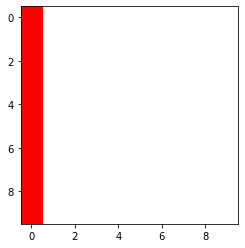

In [68]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

#print(valoresmapainicial)
data = valoresmapainicial

# create discrete colormap
cmap = colors.ListedColormap(['white','red'])

plt.imshow(data, cmap=cmap, interpolation='nearest')

plt.show()

Parseo los logs para graficar los estados siguientes de la simulación.

In [90]:
import os
import pandas as pd

LOG_FILENAME = str(CDPP_EXAMPLES)+"/rayos/log.log01"

# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL = 'time'
PORT_COL = 'port'
VALUE_COL = 'value'
MESSAGE_TYPE_COL = 'message_type'
MODEL_ORIGIN_COL = 'model_origin'
MODEL_DEST_COL = 'model_dest'

parsed_vals = pd.read_csv(VAL_FILENAME,
                           delimiter=r' /\s+',
                           engine='python',  # C engine doesnt work for regex
                           #converters=df_converters,
                           names=[0, 1,  # Not sure what first two cols are
                                  MESSAGE_TYPE_COL,
                                  TIME_COL,
                                  MODEL_ORIGIN_COL,
                                  PORT_COL,
                                  VALUE_COL,
                                  MODEL_DEST_COL]
                          )

# me quedo con los tiempos en un arreglo
ats = parsed_logs.loc[parsed_logs[MESSAGE_TYPE_COL] == "@",TIME_COL]
tiempos = np.unique(ats.to_numpy())[1:]

# para cada tiempo en el que hubo cambios en las celdas, levanto los dataframes asociados a esos cambios
for t in tiempos:
    salidas = parsed_logs.loc[parsed_logs[MESSAGE_TYPE_COL] == "Y"]
    coso = salidas.loc[salidas[TIME_COL] == t]
    print(coso)
    # la idea acá es parsear la columna model_origin 
    # (supongo que se puede tomar el substring que representa la celda)
    # copiar los valores iniciales y modificar lo que cambió en las celdas
    # (viendo la columna value), para luego graficar cada paso
    # de la misma manera que hice con el estado inicial.

     0  1 message_type            time       model_origin port    value  \
804  0  L            Y  00:00:00:100:0   rayos(0,1,0)(04)  out  0.00674   
806  0  L            Y  00:00:00:100:0   rayos(1,1,0)(24)  out  0.99981   
808  0  L            Y  00:00:00:100:0   rayos(2,1,0)(44)  out  0.99981   
810  0  L            Y  00:00:00:100:0   rayos(3,1,0)(64)  out  0.99981   
812  0  L            Y  00:00:00:100:0   rayos(4,1,0)(84)  out  0.99981   
814  0  L            Y  00:00:00:100:0  rayos(5,1,0)(104)  out  0.99981   
816  0  L            Y  00:00:00:100:0  rayos(6,1,0)(124)  out  0.99981   
818  0  L            Y  00:00:00:100:0  rayos(7,1,0)(144)  out  0.99981   
820  0  L            Y  00:00:00:100:0  rayos(8,1,0)(164)  out  0.99981   
822  0  L            Y  00:00:00:100:0  rayos(9,1,0)(184)  out  0.99981   
856  0  L            Y  00:00:00:100:0   rayos(0,0,0)(02)  out  0.00000   
858  0  L            Y  00:00:00:100:0   rayos(1,0,0)(22)  out  0.00000   
860  0  L            Y  0

# Links - Referencias
[1] [Radiography - Wikipedia](https://en.wikipedia.org/wiki/Radiography)

[2] [What is X-Ray Attenuation](https://www.radiation-dosimetry.org/what-is-x-ray-attenuation-definition/)
* [X-Ray Mass Attenuation](https://www.physics.nist.gov/PhysRefData/XrayMassCoef/chap2.html)
* [X-Ray Mass Attenuation Coefficients](https://physics.nist.gov/PhysRefData/XrayMassCoef/tab2.html)
* [Simulation of X-Ray NDT Imaging Techniques](https://www.ndt.net/article/wcndt00/papers/idn256/idn256.htm)